# Multiscale Energy Systems MILP with Material and Emission Consideration

__author__ = "Rahul Kakodkar, Yilun Lin"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Rahul Kakodkar", "Yilun Lin", Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Rahul Kakodkar"
__email__ = "cacodcar@tamu.edu"
__status__ = "Production"


## Problem Statement

The following case study considers three different type of solar photovoltaics, namely Monocrystalline (PV_Mo), Polycrystalline (PV_Po), and Cadmium Telluride (PV_Cd) and  Lithium-ion batteries made of either rock-based lithium (LiI_Ro) or brine-based lithium (LiI_Br).

The goal is to meet a varying demand for power through renewable power generation using the PVs and Lithium-ion batteries for energy storage.

Notably, the different PVs also have different conversion efficiences, as also operational expenditure. Emissions need to be tracked from all components, i.e. resource consumption, materials for establishing processs, emissions from setting up the process. 

Total emissions will atleast include the sum of the emissions from different components (at the network level) and as direct emissions from process (at the scheduling level)

Users are advised caution in terms of assigning the emissions at the appropriate levels and avoiding double account. For example, if providing the global warming potentials (GWP) for each individual material to make up a process, the GWP for processes should only consider the values for construction. Moreover, the direct emissions are considered through the resource balance constraint.

## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t

$\mathcal{B}$ - set of transport modes b

$\mathcal{L}$ - set of locations l

$\mathcal{M}$ - set of materials m

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Mat^P_{l,p,m,t}$ - material m $\in$ $\mathcal{M}$ used by process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Em^{p/r/m}_{l,p/r/m,t}$ - emission from process/resource/material in time t $\in$ $\mathcal{T}^{net}$


*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

$Mat^{cons}_{p,m}$ - material m $\in$ $\mathcal{M}$ consumed by process p $\in$ $\mathcal{P}$

$GWP^{p/r/m}_{l,p/r/m,t}$ - global warming indicators for process/resource/material in time t $\in$ $\mathcal{T}^{net}$


## MILP Formulation

Given is a mulit-scale modeling and optimization MILP framework for the simultaneous design and schedule planning of a single location energy system 

\begin{equation}
    min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} (\alpha \times Capex_{l,p,t} + Fopex_{l,p,t}) \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
    + \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
    Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
    P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
    Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
    - S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} +  Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
    \forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
    Mat_{l,p,m,t} = Mat^{cons}_{p,m} \times Cap^P_{l,p,t} \hspace{1cm} \forall m \in \mathcal{M}, p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Em^{r}_{l,r,t} = GWP^{r}_{l,r,t} \times C_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    Em^{m}_{l,m,t} = GWP^{m}_{l,m,t} \times \sum_{p \in \mathcal{P}} Mat_{l,p,m,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Em^{p}_{l,p,t} = GWP^{p}_{l,p,t} \times Cap_{l,p,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Mat_{l,p,m,t}, Em^{p/r/m}_{l,p/r/m,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [1]:
import sys
sys.path.append('../../src')


In [2]:

import pandas
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product


## Data Import

The following data is needed for the model

- solar and wind profiles : energiapy.fetch_nsrdb_data imports data from the NREL NSRDB database
- power demand : ERCOT for Houston


**Get Weather data**

In [3]:
# def load_data(loc: str, index: list):
#     df = pandas.read_csv(f'../data/{loc}_solar19.csv')
#     df['idx'] = index
#     df = df.set_index('idx')
#     return df
# idx = [(i, j, k) for i, j, k in product(range(1), range(365), range(24))]


In [4]:
# weather_ho = load_data('ho', idx)[['dni']]

**No solar for first 13 hours with non-zero demand fix**

In [5]:
# for i in range(13):
#     weather_ho['dni'][0, 0, i] = 0.5

**Demand data for Houston (ERCOT for COAST region)**

In [6]:
# demand_ho = pandas.read_excel('../data/Native_Load_2019.xlsx')[['COAST']]
# demand_ho = demand_ho.set_index(weather_ho.index)

In [7]:
demand_factor = pandas.DataFrame(data={'Power': [0.6, 0.7, 0.8, 0.3]})
revenue_factor = pandas.DataFrame(data={'Power': [0.8, 0.9, 0.94, 0.96]})
capacity_factor_pv = pandas.DataFrame(data={'PV': [0.6, 0.2, 0.9, 0.7]})
capacity_factor_wf = pandas.DataFrame(data={'WF': [0.9, 0.8, 0.5, 0.7]})

## Define temporal scale


The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.

In [8]:
scales = TemporalScale(discretization_list=[1, 4])

## Declare resources

Resources can be consumed, produced, stored, discharged (or sold).

Power demand follows a varying deterministic demand

In [9]:
bigM = 10**5
smallM = 10

In [10]:
Solar = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power', price= 0.01)

Wind = Resource(name='Wind', cons_max=bigM, basis='MW', label='Wind Power')

Power = Resource(name='Power', basis='MW', demand=True,
                 label='Power generated', varying=[VaryingResource.DETERMINISTIC_DEMAND])

LiIPower = Resource(name='LiIPower', basis='MW',
                     store_max=bigM, label='Power stored')

H2O = Resource(name='H2O', cons_max=10**10,
               price=0.001, basis='kg', label='Water', block='Resource')


## Declare Materials

Materials are utilized for the establishment of processes. Materials inturn require resources to be set up. 

In [11]:
LiR = Material(name='LiR', gwp=1.484, resource_cons={H2O: 2273}, toxicity=793, basis='kg', label='Rock-based Lithium',
               citation='Nelson Bunyui Manjong (2021), httoxicitys://www.tcc.fl.edu/media/divisions/academic-affairs/academic-enrichment/urc/poster-abstracts/Xanders_Madison_Poster_URS.pdf')  # gwp=(0.216,0.314)
LiB = Material(name='LiB', gwp=0.031, toxicity=793, basis='kg', label='Brine-based Lithium',
               citation='Nelson Bunyui Manjong (2021)')  

Monocrystalline = Material(name='Mc', gwp=20, resource_cons={H2O: 1.5}, toxicity=40.74, basis='kg', label='Mono',
                           citation='Environmental impact assessment of monocrystalline silicon solar photovoltaic cell production: a case study in China (toxicity)')
Polycrystalline = Material(name='Pc', gwp=26, resource_cons={
                           H2O: 1}, toxicity=15, basis='kg', label='Poly', citation='Environmental Economic Impact Assessments of a ... - MDPI (gwp and toxicity)')
CdTE = Material(name='CdTe', gwp=40, resource_cons={H2O: 0.25}, toxicity=5, basis='kg', label='C',
                citation='Investigation of life cycle CO2 emissions of the polycrystalline and cadmium telluride PV panels')


## Declare Processes

In [12]:
LiI = Process(name='LiI', conversion= {'Brine': {Power: -1, LiIPower: 1}, 'Rock': {Power: -1, LiIPower: 1}}, material_cons={'Brine': {LiB: 20}, 'Rock': {LiR: 20}}, capex={'Brine': 1302182, 'Rock': 1302182}, 
              fopex={'Brine': 41432, 'Rock':41432}, vopex={'Brine': 2000, 'Rock': 2000}, prod_min=smallM, prod_max=bigM, label='Lithium-ion battery', basis='MW')

LiI_discharge = Process(name='LiI_d', conversion={'Dummy': {Power: 0.8, LiIPower: -1}}, capex={'Dummy': 0.1}, material_cons={'Dummy': {LiB: 0}},
                        fopex={'Dummy': 0.1}, vopex={'Dummy': 0}, prod_max=bigM, prod_min=smallM,  label='Lithium-ion battery (d)', basis='MW')

PV = Process(name='PV', conversion={'Mo':{Solar: -5, Power: 1}, 'Po': {Solar: -6.67, Power: 1}, 'Cd': {Solar: -5, Power: 1}}, 
             capex= {'Mo': 990637, 'Po': 990637, 'Cd': 567000}, fopex= {'Mo': 3354, 'Po': 3354, 'Cd': 8720}, vopex= {'Mo': 4953, 'Po': 4953, 'Cd': 900}
             , material_cons={'Mo': {Monocrystalline: 0.4}, 'Po': {Polycrystalline: 0.36}, 'Cd': {CdTE: 0.02}},
                prod_min=smallM, prod_max=bigM, varying=[VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')


In [13]:
# LiI_Br = Process(name='LiI_Br', storage=Power, material_cons={
#                  LiB: 20}, capex=1302182, fopex=41432, vopex=2000, prod_min=smallM, prod_max=bigM, store_max=10000, label='Lithium-ion battery', basis='MW')

# LiI_Ro = Process(name='LiI_Ro', storage=Power, material_cons={
#                  LiR: 20}, capex=1302182, fopex=41432, vopex=2000, prod_min=smallM, prod_max=bigM,  store_max=10000, label='Lithium-ion battery', basis='MW')

# PV_Mo = Process(name='PV_Mo', conversion={Solar: -5, Power: 1}, capex=990637, fopex=3354, vopex=4953, material_cons={Monocrystalline: 0.4},
#                 prod_min=smallM, prod_max=bigM, varying=[VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')

# PV_Po = Process(name='PV_Po', conversion={Solar: -6.67, Power: 1}, capex=990637, fopex=3354, vopex=4953, material_cons={Polycrystalline: 0.36},
#                 prod_min=smallM, prod_max=bigM, varying=[VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')

# PV_Cd = Process(name='PV_Cd', conversion={Solar: -3.33, Power: 1}, capex=567000, fopex=8720, vopex=9000, material_cons={CdTE: 0.02},
#                 prod_min=smallM, prod_max=bigM, varying=[VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')

# Grid = Process(name='Grid', conversion={GridPower: -1, Power: 1}, capex=0,
#                fopex=0, vopex=10000000, prod_min=smallM, prod_max=bigM, label='Grid', basis='MW')


## Declare Location

In [14]:
houston = Location(name='HO', processes={LiI, PV, LiI_discharge}, capacity_factor={PV: capacity_factor_pv},
                   demand_factor={Power: demand_factor}, scales=scales, label='Houston', demand_scale_level=1, capacity_scale_level=1, price_scale_level=1)


## Declare Scenario

In [15]:

scenario = Scenario(name='scenario_full', network=houston, scales=scales,  expenditure_scale_level=0, scheduling_scale_level=1,
                    network_scale_level=0, demand_scale_level=1, capacity_scale_level = 1, label='full_case', demand={houston: {Power: 180}})


In [16]:
scenario.process_material_mode_material_dict

{'LiI': {'Brine': {'LiB': 20}, 'Rock': {'LiR': 20}},
 'LiI_d': {'Dummy': {'LiB': 0}},
 'PV': {'Mo': {'Mc': 0.4}, 'Po': {'Pc': 0.36}, 'Cd': {'CdTe': 0.02}}}

In [17]:
scenario.process_material_mode_material_dict

{'LiI': {'Brine': {'LiB': 20}, 'Rock': {'LiR': 20}},
 'LiI_d': {'Dummy': {'LiB': 0}},
 'PV': {'Mo': {'Mc': 0.4}, 'Po': {'Pc': 0.36}, 'Cd': {'CdTe': 0.02}}}

In [18]:
# plot_scenario.capacity_factor(
#     scenario=scenario, location=houston, process=PV, fig_size=(9, 5), color='orange')
# plot_scenario.demand_factor(
#     scenario=scenario, location=houston, resource=Power, fig_size=(9, 5), color='red')


## Formulate MILP

Here we formulate two milps which differ only in their objectives.

For maximizing the discharge of a particular resource, use the objective MAX_DISCHARGE, the objective resource also needs to be specified.

Similarly the discharge can also be minimized using MIN_DISCHARGE. This can be used with a demand for another resource being set. For example, minimizing the discharge of carbon dioxide while meeting a hydrogen demand.

The second MILP, minimized the cost while meeting a varying demand for power

## Optimize to maximize resource discharge

In [19]:

milp_demand = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION, Constraints.RESOURCE_BALANCE,
                        Constraints.NETWORK, Constraints.EMISSION, Constraints.MATERIAL}, objective=Objective.MAX_DISCHARGE, write_lpfile=True, objective_resource=Power)


constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential location
constraint global warming potential network
constraint global warming potential material
constraint global warming potential material mode
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint material process
constraint material location
constraint material network
constraint production facility material mode
constraint production facility material mode binary
constraint production facility material
constraint min production facility material
constraint material mode process
constraint network cost

In [20]:
scenario.process_material_mode_material_dict

{'LiI': {'Brine': {'LiB': 20}, 'Rock': {'LiR': 20}},
 'LiI_d': {'Dummy': {'LiB': 0}},
 'PV': {'Mo': {'Mc': 0.4}, 'Po': {'Pc': 0.36}, 'Cd': {'CdTe': 0.02}}}

In [21]:
scenario.process_material_mode_material_dict

{'LiI': {'Brine': {'LiB': 20}, 'Rock': {'LiR': 20}},
 'LiI_d': {'Dummy': {'LiB': 0}},
 'PV': {'Mo': {'Mc': 0.4}, 'Po': {'Pc': 0.36}, 'Cd': {'CdTe': 0.02}}}

In [22]:
# results_demand = solve(scenario=scenario, instance=milp_demand,
#                        solver='XPRESS', interface= 'gams', name="results_demand", print_solversteps=True)


In [23]:

milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION, Constraints.RESOURCE_BALANCE,
                                                      Constraints.TRANSPORT, Constraints.NETWORK, Constraints.EMISSION, Constraints.MATERIAL, Constraints.DEMAND}, objective=Objective.COST)


constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential location
constraint global warming potential network
constraint global warming potential material
constraint global warming potential material mode
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint material process
constraint material location
constraint material network
constraint production facility material mode
constraint production facility material mode binary
constraint production facility material
constraint min production facility material
constraint material mode process
constraint demand
objec

## Optimize to minimize cost

In [24]:
results_cost = solve(scenario=scenario, instance=milp_cost,
                     solver='gurobi', name=f"results_cost", print_solversteps=True)


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 248 rows, 259 columns and 580 nonzeros
Model fingerprint: 0x0c62d0f1
Variable types: 249 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e-02, 3e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e+01, 1e+05]
Presolve removed 217 rows and 235 columns
Presolve time: 0.00s
Presolved: 31 rows, 24 columns, 82 nonzeros
Variable types: 19 continuous, 5 integer (5 binary)
Found heuristic solution: objective 1.849731e+09

Root relaxation: objective 1.174071e+09, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node 

In [25]:
results_cost.output['material_process']

{('HO', 'LiI', 'CdTe', 0): 0.0,
 ('HO', 'LiI', 'LiB', 0): 1985.294117647059,
 ('HO', 'LiI', 'LiR', 0): 0.0,
 ('HO', 'LiI', 'Mc', 0): 0.0,
 ('HO', 'LiI', 'Pc', 0): 0.0,
 ('HO', 'LiI_d', 'CdTe', 0): 0.0,
 ('HO', 'LiI_d', 'LiB', 0): 0.0,
 ('HO', 'LiI_d', 'LiR', 0): 0.0,
 ('HO', 'LiI_d', 'Mc', 0): 0.0,
 ('HO', 'LiI_d', 'Pc', 0): 0.0,
 ('HO', 'PV', 'CdTe', 0): 7.0279411764705895,
 ('HO', 'PV', 'LiB', 0): 0.0,
 ('HO', 'PV', 'LiR', 0): 0.0,
 ('HO', 'PV', 'Mc', 0): 0.0,
 ('HO', 'PV', 'Pc', 0): 0.0}

In [26]:
for i in results_cost.output['material_mode_process'].keys():
    if results_cost.output['material_mode_process'][i] >0:
        print(i, results_cost.output['material_mode_process'][i])

('HO', 'LiI', 'Brine', 'LiB', 0) 1985.294117647059
('HO', 'PV', 'Cd', 'CdTe', 0) 7.0279411764705895


In [27]:
results_cost.output['Cap_P_M']

{('HO', 'LiI', 'Brine', 0): 99.26470588235296,
 ('HO', 'LiI', 'Rock', 0): 0.0,
 ('HO', 'LiI_d', 'Dummy', 0): 99.26470588235296,
 ('HO', 'PV', 'Cd', 0): 351.39705882352945,
 ('HO', 'PV', 'Mo', 0): 0.0,
 ('HO', 'PV', 'Po', 0): 0.0}

In [28]:
results_cost.output['X_M']

{('HO', 'LiI', 'Brine', 0): 1.0,
 ('HO', 'LiI', 'Rock', 0): 0.0,
 ('HO', 'LiI_d', 'Dummy', 0): 1.0,
 ('HO', 'PV', 'Cd', 0): 1.0,
 ('HO', 'PV', 'Mo', 0): 0.0,
 ('HO', 'PV', 'Po', 0): 0.0}

In [29]:
milp_cost.material_mode_process.pprint()

material_mode_process : materials utilized in material mode for each process
    Size=90, Index=material_mode_process_index
    Key                                 : Lower : Value              : Upper : Fixed : Stale : Domain
      ('HO', 'LiI', 'Brine', 'CdTe', 0) :     0 :                0.0 :  None : False : False : NonNegativeReals
       ('HO', 'LiI', 'Brine', 'LiB', 0) :     0 :  1985.294117647059 :  None : False : False : NonNegativeReals
       ('HO', 'LiI', 'Brine', 'LiR', 0) :     0 :                0.0 :  None : False : False : NonNegativeReals
        ('HO', 'LiI', 'Brine', 'Mc', 0) :     0 :                0.0 :  None : False : False : NonNegativeReals
        ('HO', 'LiI', 'Brine', 'Pc', 0) :     0 :                0.0 :  None : False : False : NonNegativeReals
         ('HO', 'LiI', 'Cd', 'CdTe', 0) :     0 :                0.0 :  None : False : False : NonNegativeReals
          ('HO', 'LiI', 'Cd', 'LiB', 0) :     0 :                0.0 :  None : False : False : NonNega

In [30]:
{i.name: {j:{l.name: m for l,m in k.items() } for j,k in i.material_cons.items()} for i in scenario.process_set}

{'LiI': {'Brine': {'LiB': 20}, 'Rock': {'LiR': 20}},
 'LiI_d': {'Dummy': {'LiB': 0}},
 'PV': {'Mo': {'Mc': 0.4}, 'Po': {'Pc': 0.36}, 'Cd': {'CdTe': 0.02}}}

In [31]:
scenario.process_material_dict

{'LiI': {'CdTe': 0, 'LiB': 0, 'Pc': 0, 'LiR': 0, 'Mc': 0},
 'LiI_d': {'CdTe': 0, 'LiB': 0, 'Pc': 0, 'LiR': 0, 'Mc': 0},
 'PV': {'CdTe': 0, 'LiB': 0, 'Pc': 0, 'LiR': 0, 'Mc': 0}}

In [32]:
results_cost.output['Vopex_process']

{('HO', 'LiI', 0): 397058.8235294118,
 ('HO', 'LiI_d', 0): 0.0,
 ('HO', 'PV', 0): 6049770.88235294}

In [33]:
milp_cost.constraint_production_facility_material_mode_binary.pprint()

constraint_production_facility_material_mode_binary : capacity of process under different material modes
    Size=3, Index=constraint_production_facility_material_mode_binary_index, Active=True
    Key                : Lower : Body                                                               : Upper : Active
      ('HO', 'LiI', 0) :   0.0 :           X_M[HO,LiI,Brine,0] + X_M[HO,LiI,Rock,0] - X_P[HO,LiI,0] :   0.0 :   True
    ('HO', 'LiI_d', 0) :   0.0 :                            X_M[HO,LiI_d,Dummy,0] - X_P[HO,LiI_d,0] :   0.0 :   True
       ('HO', 'PV', 0) :   0.0 : X_M[HO,PV,Cd,0] + X_M[HO,PV,Mo,0] + X_M[HO,PV,Po,0] - X_P[HO,PV,0] :   0.0 :   True


In [34]:
milp_cost.constraint_process_capex.pprint()

constraint_process_capex : capex for process
    Size=3, Index=constraint_process_capex_index, Active=True
    Key                : Lower : Body                                                                                             : Upper : Active
      ('HO', 'LiI', 0) :   0.0 :                    Capex_process[HO,LiI,0] - (1302182*Cap_P[HO,LiI,0] + 1302182*Cap_P[HO,LiI,0]) :   0.0 :   True
    ('HO', 'LiI_d', 0) :   0.0 :                                                Capex_process[HO,LiI_d,0] - 0.1*Cap_P[HO,LiI_d,0] :   0.0 :   True
       ('HO', 'PV', 0) :   0.0 : Capex_process[HO,PV,0] - (567000*Cap_P[HO,PV,0] + 990637*Cap_P[HO,PV,0] + 990637*Cap_P[HO,PV,0]) :   0.0 :   True


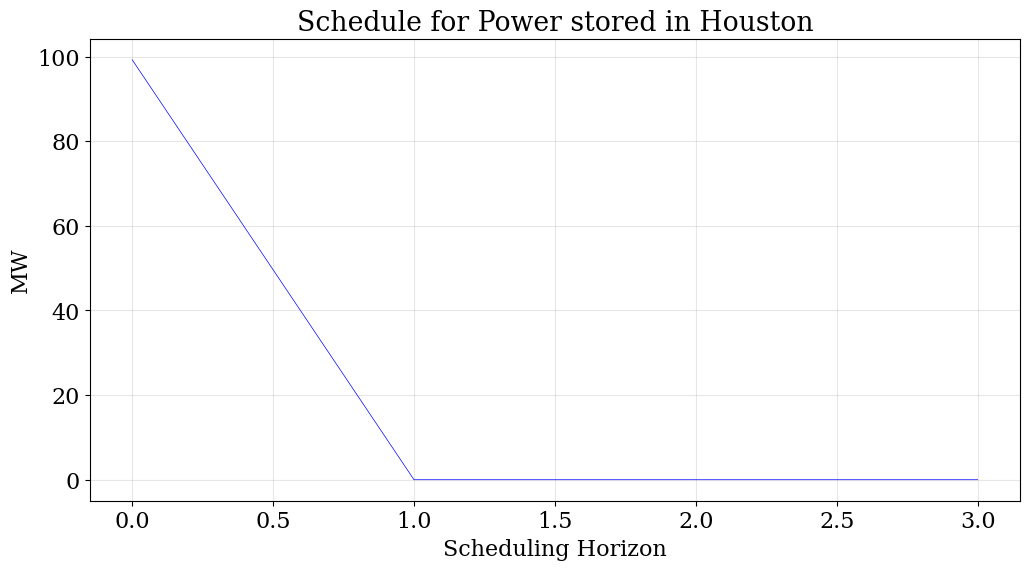

In [35]:
plot_results.schedule(results=results_cost, y_axis='Inv',
                      component='LiIPower', location='HO')


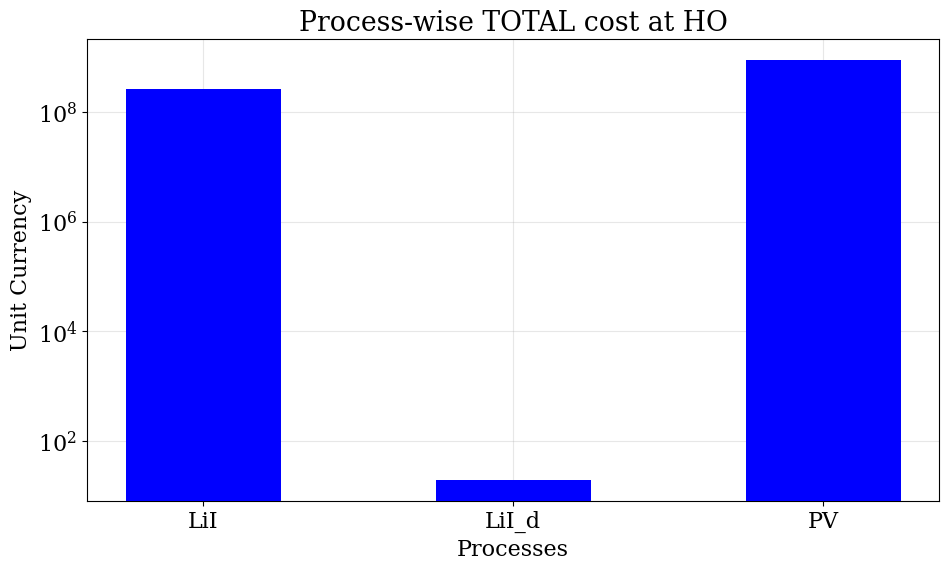

In [36]:
plot_results.cost(results=results_cost, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))


In [37]:
results_cost.output['Cap_P']

{('HO', 'LiI', 0): 99.26470588235296,
 ('HO', 'LiI_d', 0): 99.26470588235296,
 ('HO', 'PV', 0): 351.39705882352945}

In [38]:
results_cost.output['global_warming_potential_material']

{('HO', 'LiI', 0): 61.54411764705883,
 ('HO', 'LiI_d', 0): 0.0,
 ('HO', 'PV', 0): 281.1176470588236}

In [39]:
results_cost.output['global_warming_potential_process']

{('HO', 'LiI', 0): 0.0, ('HO', 'LiI_d', 0): 0.0, ('HO', 'PV', 0): 0.0}

In [40]:
results_cost.output['X_P']

{('HO', 'LiI', 0): 1.0, ('HO', 'LiI_d', 0): 1.0, ('HO', 'PV', 0): 1.0}

In [41]:
scenario.process_gwp_dict

{'HO': {'LiI': 0, 'LiI_d': 0, 'PV': 0}}

In [42]:
scenario.material_gwp_dict

{'HO': {'CdTe': 40, 'LiB': 0.031, 'Pc': 26, 'LiR': 1.484, 'Mc': 20}}

In [43]:
scenario.process_material_dict

{'LiI': {'CdTe': 0, 'LiB': 0, 'Pc': 0, 'LiR': 0, 'Mc': 0},
 'LiI_d': {'CdTe': 0, 'LiB': 0, 'Pc': 0, 'LiR': 0, 'Mc': 0},
 'PV': {'CdTe': 0, 'LiB': 0, 'Pc': 0, 'LiR': 0, 'Mc': 0}}

In [45]:
results_cost.output['material_process']

{('HO', 'LiI', 'CdTe', 0): 0.0,
 ('HO', 'LiI', 'LiB', 0): 1985.294117647059,
 ('HO', 'LiI', 'LiR', 0): 0.0,
 ('HO', 'LiI', 'Mc', 0): 0.0,
 ('HO', 'LiI', 'Pc', 0): 0.0,
 ('HO', 'LiI_d', 'CdTe', 0): 0.0,
 ('HO', 'LiI_d', 'LiB', 0): 0.0,
 ('HO', 'LiI_d', 'LiR', 0): 0.0,
 ('HO', 'LiI_d', 'Mc', 0): 0.0,
 ('HO', 'LiI_d', 'Pc', 0): 0.0,
 ('HO', 'PV', 'CdTe', 0): 7.0279411764705895,
 ('HO', 'PV', 'LiB', 0): 0.0,
 ('HO', 'PV', 'LiR', 0): 0.0,
 ('HO', 'PV', 'Mc', 0): 0.0,
 ('HO', 'PV', 'Pc', 0): 0.0}